In [1]:
# Import library files
from freq_ope.key import keygen
from freq_ope.server import OPEServer as OPE
from freq_ope.aes import AESCipher
from freq_ope.client import OPEClient as Client

import time
import random
import matplotlib.pyplot as plt

In [723]:
# Storing first, second and third evaluation results of other authors

kers = [0.004, 0.006, 0.04, 0.04, 0.15, 0.25, 0.4, 0.6]
yang = [0.001, 0.0045, 0.02, 0.035, 0.05, 0.1, 0.2, 0.3]
mafei = [0.009, 0.2, 1, 6, 15, 50, 80, 110]

kers2 = [0.0008, 0.001, 0.002, 0.009, 0.01, 0.02, 0.04, 0.06]
yang2 = [0.008, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15]
mafei2 = [0.008, 0.05, 0.3, 0.7, 1.5, 5, 8, 11]

kers3 = [0.002, 0.009, 0.01, 0.07, 0.1, 0.2, 0.4, 0.6]
yang3 = [0.008, 0.012, 0.02, 0.08, 0.3, 0.5, 0.8, 1.4]
mafei3 = [0.009, 0.3, 5, 9, 30, 60, 100, 120]

In [308]:
# Load AES Clipher
aes = AESCipher(keygen(128))

In [682]:
# Evaluation # 1
# Data with Duplicates

tests = [128, 256, 384, 512, 640, 768, 896, 1024]
N = [64, 128, 192, 256, 320, 384, 448, 512]
results1 = []

for i in range(len(tests)):
    
    plaintexts = [random.randrange(0,N[i]) for _ in range(tests[i])]
    print("Plaintexts:", len(plaintexts))
    
    ope = OPE(1<<tests[i])
    client = Client(aes, ope)
    
    t = time.time()
    for i,pt in enumerate(plaintexts):
        client.add_plaintext(pt)
        
    time_taken = time.time()-t
    results1.append(time_taken)
    print("Time taken: %.2f" % (time_taken*1000))
    inorder = inorderTraversal(ope.root)
    print("Resulting Tree Sample", inorder[:5])
    print(len(ope.dct))

Plaintexts: 128
Time taken: 19.26
Resulting Tree Sample [10633823966279326983230456482242756608, 15950735949418990474845684723364134912, 21267647932558653966460912964485513216, 42535295865117307932921825928971026432, 43199909863009765869373729459111198720]
128
Plaintexts: 256
Time taken: 22.52
Resulting Tree Sample [1809251394333065553493296640760748560207343510400633813116524750123642650624, 2713877091499598330239944961141122840311015265600950719674787125185463975936, 3618502788666131106986593281521497120414687020801267626233049500247285301248, 4523128485832663883733241601901871400518358776001584532791311875309106626560, 5427754182999196660479889922282245680622030531201901439349574250370927951872]
256
Plaintexts: 384
Time taken: 55.78
Resulting Tree Sample [76957043352332967211482500195592995713046365762627825523336510555167425334955489475418488779072100860950445293568, 153914086704665934422965000391185991426092731525255651046673021110334850669910978950836977558144201721900890587136, 

In [683]:
# Printing results of first evaluation
print(results1)

[0.019257783889770508, 0.02251887321472168, 0.05578184127807617, 0.04241800308227539, 0.08689475059509277, 0.06433606147766113, 0.07462310791015625, 0.1114661693572998]


In [685]:
# Evaluation 2
# Distinct Data

tests = [128, 256, 384, 512, 640, 768, 896, 1024]
results2 = []

for i in range(len(tests)):
    
    plaintexts = [i for i in range(1,tests[i]+1)]
    random.shuffle(plaintexts)
    print("Plaintexts:", len(plaintexts))
    
    ope = OPE(1<<tests[i])
    client = Client(aes, ope)
    
    t = time.time()
    for i,pt in enumerate(plaintexts):
        client.add_plaintext(pt)
        
    time_taken = time.time()-t
    results2.append(time_taken)
    print("Time taken: %.2f" % (time_taken*1000))
    inorder = inorderTraversal(ope.root)
    print("Resulting Tree Sample", inorder[:10])
    print(len(ope.dct))

Plaintexts: 128
Time taken: 22.02
Resulting Tree Sample [5316911983139663491615228241121378304, 10633823966279326983230456482242756608, 13292279957849158729038070602803445760, 13624586956795387697264022367873531904, 13956893955741616665489974132943618048, 14123047455214731149602950015478661120, 14289200954687845633715925898013704192, 14621507953634074601941877663083790336, 15286121951526532538393781193223962624, 15950735949418990474845684723364134912]
128
Plaintexts: 256
Time taken: 33.27
Resulting Tree Sample [226156424291633194186662080095093570025917938800079226639565593765455331328, 452312848583266388373324160190187140051835877600158453279131187530910662656, 678469272874899582559986240285280710077753816400237679918696781296365993984, 791547485020716179653317280332827495090712785800277293238479578179093659648, 904625697166532776746648320380374280103671755200316906558262375061821325312, 1809251394333065553493296640760748560207343510400633813116524750123642650624, 36185027886661311069

Time taken: 105.52
Resulting Tree Sample [702223880805592151456759840151962786569522257399338504974336254522393264865238137237142489540654437582500444843247630303354647534431314931612685275935445798350655833690880801860555545317367555154113605281582053784524026102900245630757473088050106395169337932361665227499793929447186391815763110662594625536, 1404447761611184302913519680303925573139044514798677009948672509044786529730476274474284979081308875165000889686495260606709295068862629863225370551870891596701311667381761603721111090634735110308227210563164107569048052205800491261514946176100212790338675864723330454999587858894372783631526221325189251072, 2106671642416776454370279520455888359708566772198015514923008763567179794595714411711427468621963312747501334529742890910063942603293944794838055827806337395051967501072642405581666635952102665462340815844746161353572078308700736892272419264150319185508013797084995682499381788341559175447289331987783876608, 24577835828195725300986594405318

In [686]:
# Printing results of second evaluation
print(results2)

[0.02201986312866211, 0.03326702117919922, 0.04651618003845215, 0.03799009323120117, 0.10347700119018555, 0.0686178207397461, 0.08805394172668457, 0.10551977157592773]


In [725]:
# Evaluation 3
# Distinct and Sequential data

tests = [128, 256, 384, 512, 640, 768, 896, 1024]
results3 = []

for i in range(len(tests)):
    
    plaintexts = [i for i in range(tests[i], 0, -1)]
    print("Plaintexts:", len(plaintexts))
    
    ope = OPE(1<<tests[i])
    client = Client(aes, ope)
    
    t = time.time()
    for i,pt in enumerate(plaintexts):
        client.add_plaintext(pt)
        
    time_taken = time.time()-t
    results3.append(time_taken)
    print("Time taken: %.2f" % (time_taken*1000))
    inorder = inorderTraversal(ope.root)
    print("Resulting Tree Sample", inorder[:10])
    print(len(ope.dct))

Plaintexts: 128
Time taken: 59.91
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
128
Plaintexts: 256
Time taken: 257.04
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
256
Plaintexts: 384
Time taken: 681.12
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
384
Plaintexts: 512
Time taken: 1723.01
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
512
Plaintexts: 640
Time taken: 2963.06
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
640
Plaintexts: 768
Time taken: 4399.27
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
768
Plaintexts: 896
Time taken: 8940.20
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
896
Plaintexts: 1024
Time taken: 11944.03
Resulting Tree Sample [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
1024


In [689]:
print(results3)

[0.06221795082092285, 0.21689486503601074, 0.7260689735412598, 1.5941412448883057, 2.9426488876342773, 5.088922023773193, 7.100314140319824, 10.6754732131958]


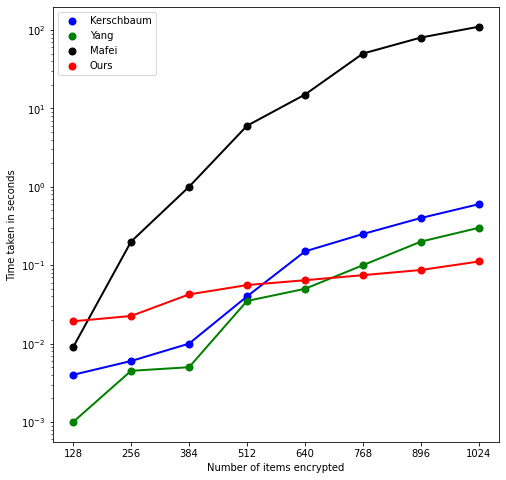

In [716]:
# Plot results of first evaluation

a = [pow(10,i) for i in range(-3,3)]

plt.figure(facecolor='white', figsize=(8,8))
plt.scatter(tests, kers, color='blue', lw=2)
plt.scatter(tests, yang, color='green', lw=2)
plt.scatter(tests, mafei, color='black', lw=2)
plt.scatter(tests, sorted(results1), color='red', lw=2)
plt.plot(tests, kers, color='blue', lw=2)
plt.plot(tests, yang, color='green', lw=2)
plt.plot(tests, mafei, color='black', lw=2)
plt.plot(tests, sorted(results1), color='red', lw=2)
plt.yscale('log')
plt.xticks(tests)
plt.legend(['Kerschbaum', 'Yang', 'Mafei', 'Ours'])
plt.xlabel('Number of items encrypted')
plt.ylabel('Time taken in seconds')
plt.show()

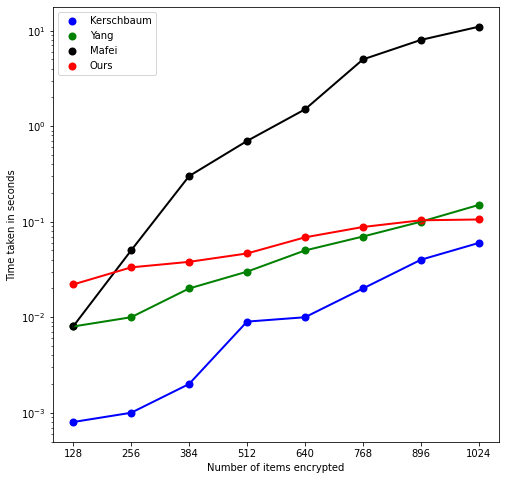

In [717]:
# Plot results of second evaluation

a = [pow(10,i) for i in range(-3,3)]

plt.figure(facecolor='white', figsize=(8,8))
plt.scatter(tests, kers2, color='blue', lw=2)
plt.scatter(tests, yang2, color='green', lw=2)
plt.scatter(tests, mafei2, color='black', lw=2)
plt.scatter(tests, sorted(results2), color='red', lw=2)
plt.plot(tests, kers2, color='blue', lw=2)
plt.plot(tests, yang2, color='green', lw=2)
plt.plot(tests, mafei2, color='black', lw=2)
plt.plot(tests, sorted(results2), color='red', lw=2)
plt.yscale('log')
plt.xticks(tests)
plt.legend(['Kerschbaum', 'Yang', 'Mafei', 'Ours'])
plt.xlabel('Number of items encrypted')
plt.ylabel('Time taken in seconds')
plt.show()

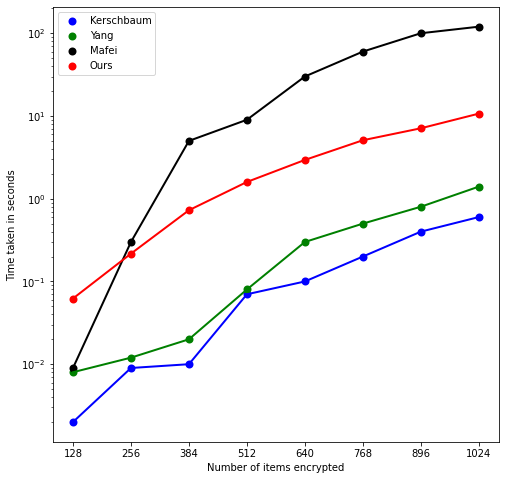

In [718]:
# Plot results of third evaluation

a = [pow(10,i) for i in range(-3,3)]

plt.figure(facecolor='white', figsize=(8,8))
plt.scatter(tests, kers3, color='blue', lw=2)
plt.scatter(tests, yang3, color='green', lw=2)
plt.scatter(tests, mafei3, color='black', lw=2)
plt.scatter(tests, sorted(results3), color='red', lw=2)
plt.plot(tests, kers3, color='blue', lw=2)
plt.plot(tests, yang3, color='green', lw=2)
plt.plot(tests, mafei3, color='black', lw=2)
plt.plot(tests, sorted(results3), color='red', lw=2)
plt.yscale('log')
plt.xticks(tests)
plt.legend(['Kerschbaum', 'Yang', 'Mafei', 'Ours'])
plt.xlabel('Number of items encrypted')
plt.ylabel('Time taken in seconds')
plt.show()